In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 8.0 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=491893a78298e3bc1e3ce27a05c97c7ede20fb6f93c3a1a3183d61d8ca5ab6ba
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf

import numpy as np
import pandas as pd
from pandas import datetime

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
%matplotlib inline

from statsmodels.distributions.empirical_distribution import ECDF

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from fbprophet.make_holidays import get_holiday_names

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot, plot_plotly, plot_forecast_component_plotly

from fbprophet.diagnostics import performance_metrics, rmse
from google.colab import drive

In [ ]:
df_AAPL = yf.download('AAPL', start = '2017-08-31', end = '2021-08-31')
df_AAPL.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
fig = px.line(df_AAPL, x = 'Date' ,y = 'Close')
fig.show()


In [ ]:
df_AAPL = df_AAPL[['Date','Close']]
df_AAPL['Date'] = pd.to_datetime(df_AAPL['Date'])
df_AAPL.columns = ['ds','y']

In [ ]:
df_AAPL

,ds,y
0,2017-08-31,41.000000
1,2017-09-01,41.012501
2,2017-09-05,40.520000
3,2017-09-06,40.477501
4,2017-09-07,40.314999
...,...,...
1001,2021-08-24,149.619995
1002,2021-08-25,148.360001
1003,2021-08-26,147.539993
1004,2021-08-27,148.600006


### MSE 15.46

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


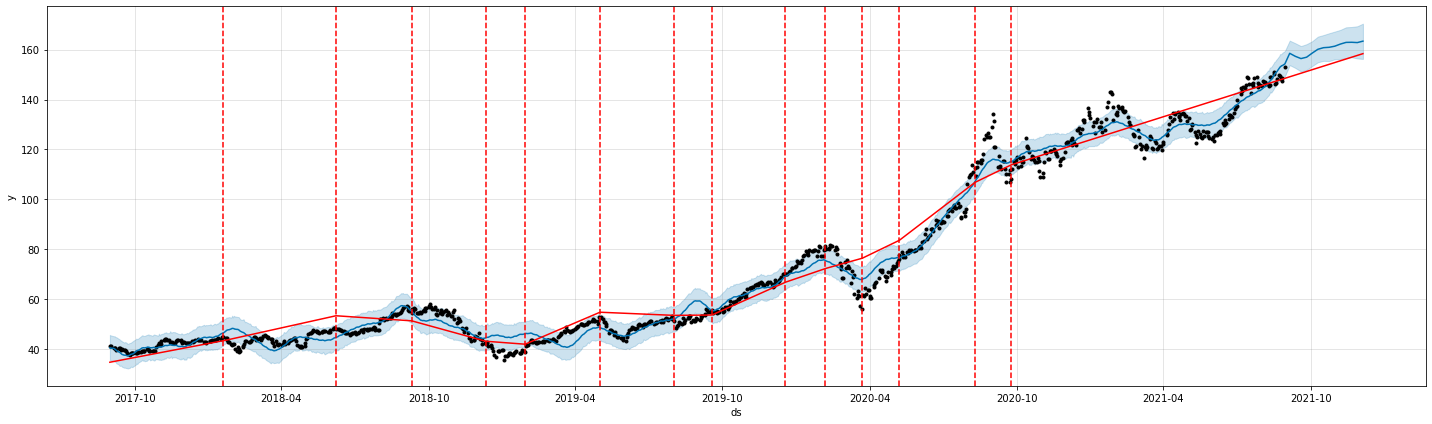

In [151]:
model = Prophet()
model.fit(df_AAPL)
future = model.make_future_dataframe(periods=1 * 14, freq='W') # freq = 'D' 일때는 weekly-seasonality 를 제거
forecast = model.predict(future)
fig = model.plot(forecast, figsize=(20,6))
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

In [ ]:
chg_point = model.changepoints.reset_index()
deltas = model.params['delta'].mean(0)

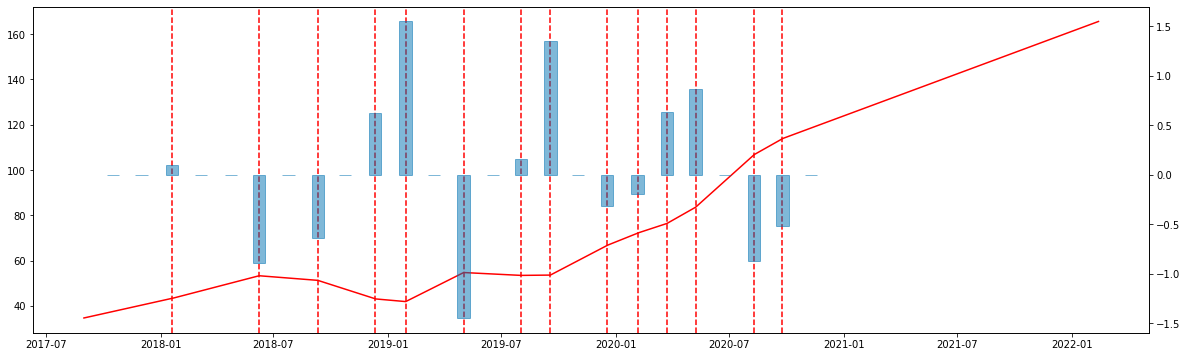

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20,6))  
add_changepoints_to_plot(fig.gca(), model, forecast)
ax2 = ax.twinx()
ax2.bar(chg_point['ds'], deltas, facecolor='#0072B2', edgecolor='#0072B2',width= 20, alpha=0.5)


plt.show()

# Seasonality yearly
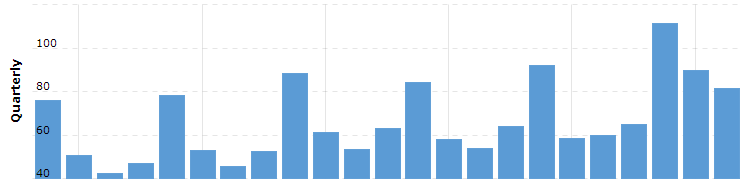

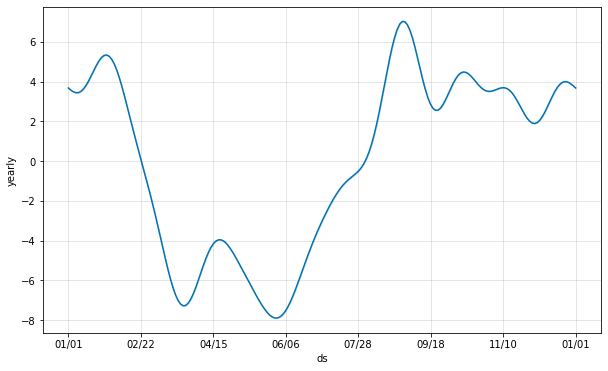

In [ ]:
from fbprophet.plot import plot_seasonality , plot_forecast_component
plot_seasonality(model, name = 'yearly')
plt.show()

# Trend

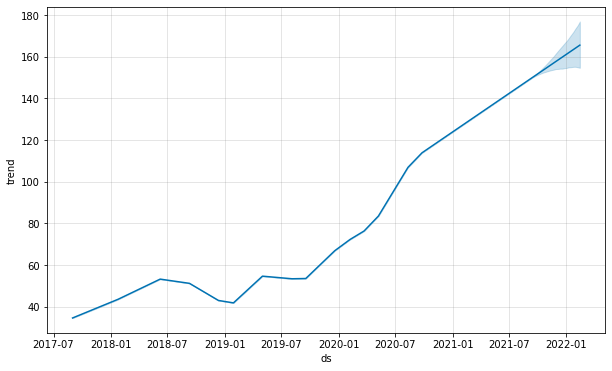

In [ ]:
plot_forecast_component(model, forecast, name='trend')
plt.show()

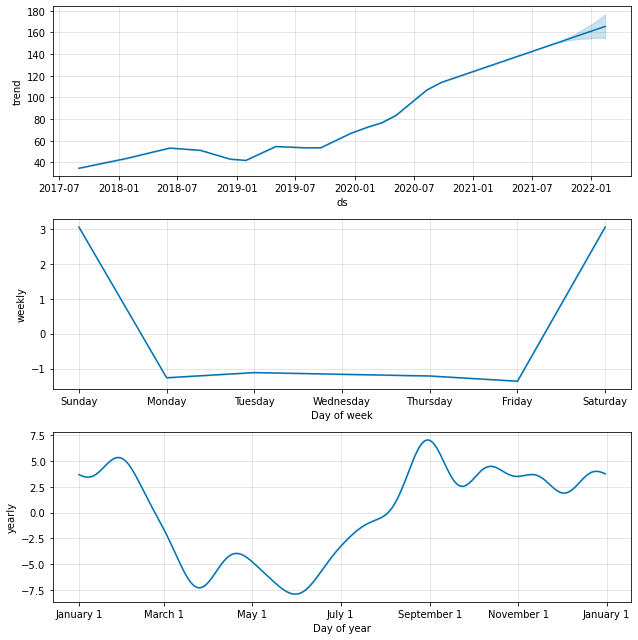

In [ ]:
CompoPlot = model.plot_components(forecast)

In [ ]:
plot_plotly(model, forecast)

## 모델의 예측이 얼마나 정확한지 알기 위해 MSE 를 구해보도록 하겠습니다.

In [144]:
y_pred = forecast['yhat'][0:1006]
y_data = df_AAPL['y']

In [149]:
print(y_pred.shape, y_data.shape)

(1006,) (1006,)


In [148]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_data,y_pred)

15.461392043549466